In [15]:
# %run "../../../common/0_notebooks_base_setup.py"   

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


En la práctica de la clase de hoy usaremos un dataset de Kaggle que tiene datos de ventas:

https://www.kaggle.com/kyanyoga/sample-sales-data

Ustedes tienen un subconjunto de los datos disponibles para resolver los ejercicios de esta práctica.

## Ejercicio 1
Leer los datos del archivo /M1/CLASE_03/Data/sales_data_sample_excercise.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Las columnas son:

* ORDERNUMBER: int, id de la orden

* SALES: float, monto abonado

* MONTH_ID: int, mes

* YEAR_ID: int, año

* PRODUCTLINE: str, producto

* COUNTRY: str, país de venta

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [16]:
import numpy as np

# local:
data_location = '../Data/sales_data_sample_excercise.csv'
data_type_str = np.genfromtxt(data_location, skip_header=1, delimiter='\t', dtype="str")
data_type_str

array([['10107', '2871', '2', '2003', 'Motorcycles', 'USA'],
       ['10121', '2765.9', '5', '2003', 'Motorcycles', 'France'],
       ['10134', '3884.34', '7', '2003', 'Motorcycles', 'France'],
       ...,
       ['10386', '5417.57', '3', '2005', 'Ships', 'Spain'],
       ['10397', '2116.16', '3', '2005', 'Ships', 'France'],
       ['10414', '3079.44', '5', '2005', 'Ships', 'USA']], dtype='<U16')

In [17]:
order_index = 0
sales_index = 1
month_index = 2
year_index = 3
product_index = 4
country_index = 5

## Ejercicio 2

La función `distribution_plotter` grafica los datos que recibe como parámetro en una instancia de numpy array

Graficar los precios de ventas en tres países. ¿Qué pueden decir respecto a sus distribuciones?

Comparar las distribuciones con la de los precios de ventas sin distinguir por paises

In [18]:
import seaborn as sns

def distribution_plotter(data, label, bin_width=500):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)

In [41]:
countries = np.unique(data_type_str[:, 5])
countries[range(3)]
country_vector = data_type_str[:, country_index]
mask_usa = country_vector == "USA"
mask_france = country_vector == "France"
mask_spain = country_vector == "Spain"
sales_usa = data_type_str[mask_usa][:, sales_index].astype("float")
sales_france = data_type_str[mask_france][:, sales_index].astype("float")
sales_spain = data_type_str[mask_spain][:, sales_index].astype("float")
total_sales = data_type_str[:, sales_index].astype("float")

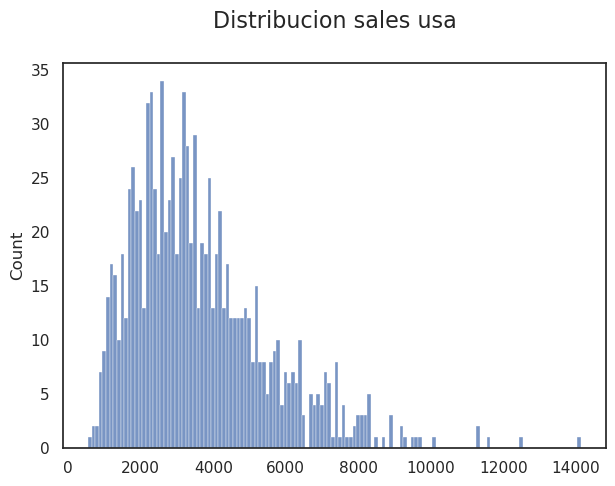

In [38]:
distribution_plotter(sales_usa, "sales usa", 100)

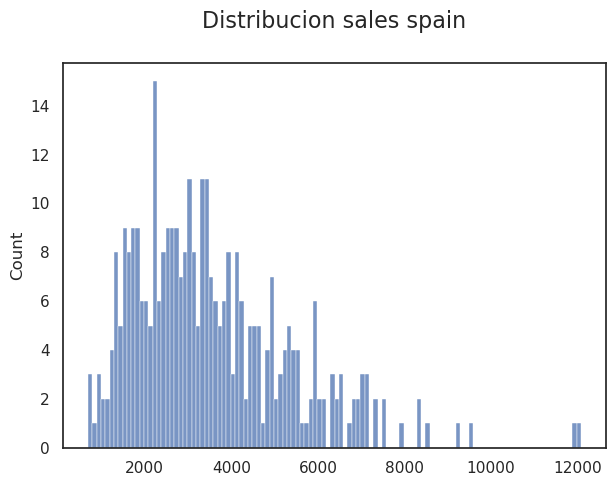

In [39]:
distribution_plotter(sales_spain, "sales spain", 100)

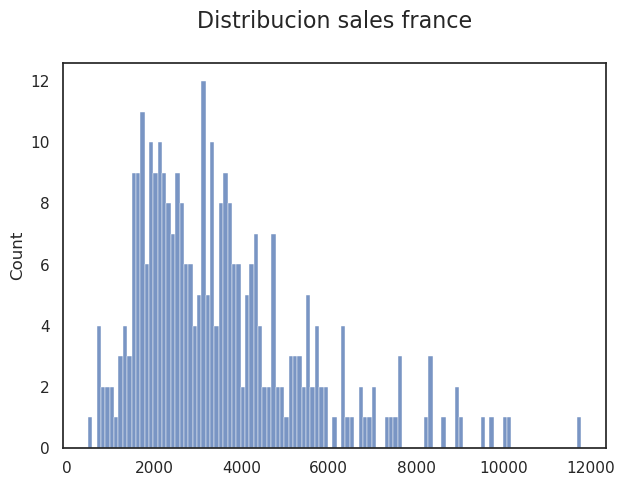

In [40]:
distribution_plotter(sales_france, "sales france", 100)

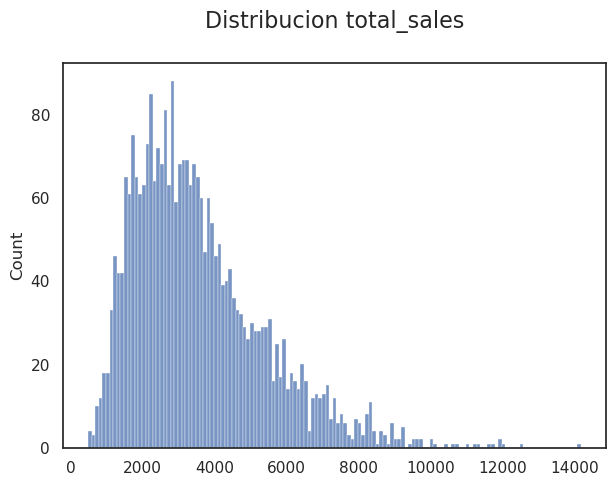

In [42]:
distribution_plotter(total_sales, "total_sales", 100)

## Ejercicio 3
Para los tres países del punto anterior, calcular con dos decimales
* Media
* Mediana
* Rango
* Desvío estandard

Repetir para todos los datos de ventas sin distinguir por país.

¿Qué conclusiones pueden sacar respecto a la información que brinda cada una de estas medidas en este caso particular?

In [59]:
sales_usa_mean = np.round(np.mean(sales_usa), decimals=2)
sales_france_mean = np.round(np.mean(sales_france), decimals=2)
sales_spain_mean = np.round(np.mean(sales_spain), decimals=2)
total_sales_mean = np.round(np.mean(total_sales), decimals=2)

sales_usa_median = np.round(np.median(sales_usa), decimals=2)
sales_france_median = np.round(np.median(sales_france), decimals=2)
sales_spain_median = np.round(np.median(sales_spain), decimals=2)
total_sales_median = np.round(np.median(total_sales), decimals=2)

sales_usa_range = np.round(np.max(sales_usa) - np.min(sales_usa), decimals=2)
sales_france_range = np.round(np.max(sales_france) - np.min(sales_france), decimals=2)
sales_spain_range = np.round(np.max(sales_spain) - np.min(sales_spain), decimals=2)
total_sales_range = np.round(np.max(total_sales) - np.min(total_sales), decimals=2)

sales_usa_std = np.round(np.std(sales_usa), decimals=2)
sales_france_std = np.round(np.std(sales_france), decimals=2)
sales_spain_std = np.round(np.std(sales_spain), decimals=2)
total_sales_std = np.round(np.std(total_sales), decimals=2)
print(f"\t\tusa\t\tfrance\t\tspain\t\ttotal")
print(f" media\t\t{sales_usa_mean}\t\t{sales_france_mean}\t\t{sales_spain_mean}\t\t{total_sales_mean}")
print(f" mediana\t{sales_usa_median}\t\t{sales_france_median}\t\t{sales_spain_median}\t\t{total_sales_median}")
print(f" rango\t\t{sales_usa_range}\t{sales_france_range}\t{sales_spain_range}\t\t{total_sales_range}")
print(f" desvio\t\t{sales_usa_std}\t\t{sales_france_std}\t\t{sales_spain_std}\t\t{total_sales_std}")

		usa		france		spain		total
 media		3613.53		3537.95		3554.64		3553.89
 mediana	3236.06		3154.3		3213.8		3184.8
 rango		13541.66	11257.57	11317.2		13600.67
 desvio		1880.0		1939.21		1833.14		1841.54
